# Emprestimos Biblioteca - Previsão

In [84]:
'''
import random
import pandas as pd
from datetime import date, timedelta

data_inicio = date(2021, 1, 1)
data_fim = data_inicio + timedelta(days=365*2)

data = []

data_atual = data_inicio
while data_atual <= data_fim:
    if data_atual.weekday() in [5, 6]:
        emprestimos = int(random.gauss(100, 10))
    else:
        emprestimos = int(random.gauss(1500, 20))
        
    if data_atual.month in [7, 12]:
        emprestimos = int(emprestimos * 0.4)
    
    data.append((data_atual, emprestimos))
    
    data_atual += timedelta(days=1)

df = pd.DataFrame(data, columns=['Date', 'emprestimos'])

# Exibir os dados gerados
df.to_csv('emprestimos_biblioteca.csv',index=False)
'''


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('/home/franciscofoz/Documents/GitHub/math-stats-training/Estatística/Datasets/emprestimos_biblioteca.csv')

df['Date'] = pd.to_datetime(df.Date)
df['mes'] = df['Date'].dt.month
df['dia_semana'] = df['Date'].dt.weekday

In [90]:
df

,Date,emprestimos,mes,dia_semana
0,2021-01-01,1489,1,4
1,2021-01-02,89,1,5
2,2021-01-03,114,1,6
3,2021-01-04,1539,1,0
4,2021-01-05,1493,1,1
...,...,...,...,...
726,2022-12-28,592,12,2
727,2022-12-29,600,12,3
728,2022-12-30,612,12,4
729,2022-12-31,40,12,5


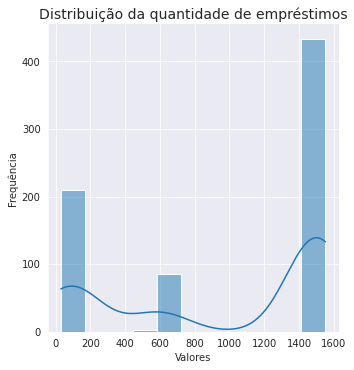

In [91]:
sns.set_style('darkgrid')


sns.displot(df.emprestimos, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição da quantidade de empréstimos',size=14)
plt.show()

# Dias "comuns" - Semana e sem período de férias

In [92]:
meses_semferias = [1,2,3,4,5,6,8,9,10,11]
df_semana_sem_ferias = df.query('dia_semana < 5').query('mes != @meses_semferias')

In [93]:
df_semana_sem_ferias

,Date,emprestimos,mes,dia_semana
181,2021-07-01,608,7,3
182,2021-07-02,597,7,4
185,2021-07-05,594,7,0
186,2021-07-06,599,7,1
187,2021-07-07,604,7,2
...,...,...,...,...
724,2022-12-26,593,12,0
725,2022-12-27,609,12,1
726,2022-12-28,592,12,2
727,2022-12-29,600,12,3


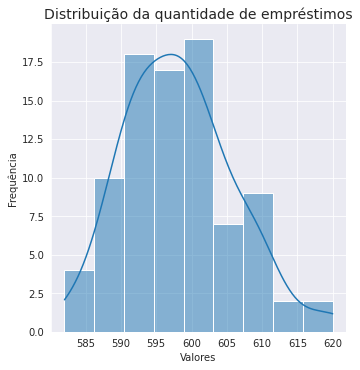

In [94]:
sns.set_style('darkgrid')


sns.displot(df_semana_sem_ferias.emprestimos, kde=True)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Distribuição da quantidade de empréstimos',size=14)
plt.show()

In [95]:
emprestimos_por_dia_semana = df_semana_sem_ferias[['dia_semana','emprestimos']].groupby(by='dia_semana').sum()
emprestimos_por_dia_semana_total = df_semana_sem_ferias[['dia_semana','emprestimos']].groupby(by='dia_semana').sum().sum()

In [96]:
emprestimos_por_dia_semana

,emprestimos
dia_semana,
0,9594
1,9533
2,10180
3,11366
4,11967


In [97]:
(emprestimos_por_dia_semana / emprestimos_por_dia_semana_total * 100).round(2)

,emprestimos
dia_semana,
0,18.23
1,18.11
2,19.34
3,21.59
4,22.73


In [98]:
df_semana_sem_ferias[['dia_semana','emprestimos']].groupby(by='dia_semana').describe().round(2)

emprestimos                                                   
                 count    mean   std    min     25%    50%     75%    max
dia_semana                                                               
0                 16.0  599.62  6.51  592.0  593.75  598.5  604.75  609.0
1                 16.0  595.81  6.45  582.0  591.75  596.5  599.00  609.0
2                 17.0  598.82  8.54  588.0  592.00  599.0  604.00  620.0
3                 19.0  598.21  7.98  586.0  593.00  598.0  602.50  614.0
4                 20.0  598.35  8.59  583.0  593.00  598.0  602.00  619.0

## Qual a probabilidade de se ter menos do que 570 empréstimos por dia?

In [102]:
df_semana_sem_ferias.emprestimos.describe()

count     88.000000
mean     598.181818
std        7.660235
min      582.000000
25%      592.750000
50%      598.000000
75%      602.250000
max      620.000000
Name: emprestimos, dtype: float64

In [78]:
import scipy.stats as stats
import numpy as np

In [103]:
media = df_semana_sem_ferias.emprestimos.mean()
desvio_padrao = df_semana_sem_ferias.emprestimos.std()
Z = (570 - media) / desvio_padrao
Z

-3.678975493301442

In [104]:
probabilidade = stats.norm.cdf(Z) * 100
probabilidade

0.011708638314192433

## Qual a probabilidade de se ter menos do que 598 empréstimos por dia?

In [105]:
media = df_semana_sem_ferias.emprestimos.mean()
desvio_padrao = df_semana_sem_ferias.emprestimos.std()
Z = (598 - media) / desvio_padrao
Z

-0.023735325763228406

In [106]:
probabilidade = stats.norm.cdf(Z) * 100
probabilidade

49.05318640261173